In [1]:
import matplotlib.pyplot as plt

import datamol as dm

### Common functions

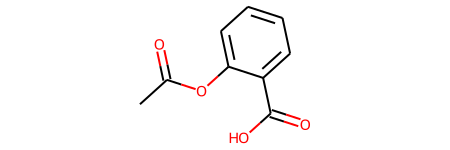

In [2]:
# Mol from a smiles
mol = dm.to_mol("O=C(C)Oc1ccccc1C(=O)O", sanitize=True)
mol

In [3]:
# Morgan fingerprint
fp = dm.to_fp(mol)
fp

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [4]:
# Generate a selfies
selfies = dm.to_selfies(mol)
selfies

'[C][C][=Branch1][C][=O][O][C][=C][C][=C][C][=C][Ring1][=Branch1][C][=Branch1][C][=O][O]'

In [5]:
# Get InChi
inchi = dm.to_inchi(mol)
inchi

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

### Dataframe and list of molecules

In [6]:
# Load a built-in dataset (only for demonstration purposes)
data = dm.data.freesolv()

# Make a molecule column from the smiles column
data["mol"] = data["smiles"].apply(lambda x: dm.to_mol(x))

data.head()

,iupac,smiles,expt,calc,mol
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [7]:
# Convert a dataframe to a list of mols
data = dm.data.freesolv()
mols = dm.from_df(data, smiles_column="smiles")
mols[:5]

In [8]:
# Convert a list of mols to a dataframe
df = dm.to_df(mols)
df.head()

,smiles,iupac,expt,calc
0,COc1ccc(C(=O)N(C)C)cc1,"4-methoxy-N,N-dimethyl-benzamide",-11.01,-9.625
1,CS(=O)(=O)Cl,methanesulfonyl chloride,-4.87,-6.219
2,C=CC(C)C,3-methylbut-1-ene,1.83,2.452
3,CCc1cnccn1,2-ethylpyrazine,-5.45,-5.809
4,CCCCCCCO,heptan-1-ol,-4.21,-2.917


### Visualization

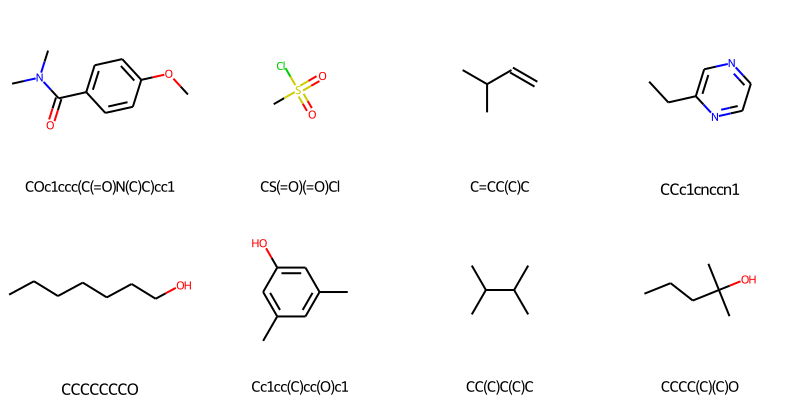

In [10]:
# Get a list of molecules
data = dm.data.freesolv()
mols = dm.from_df(data)
mols = mols[:8]

# Make an image from the molecules list with their SMILES as legend.
legends = [dm.to_smiles(mol) for mol in mols]
dm.viz.to_image(mols, legends=legends, n_cols=4, mol_size=(200, 200), use_svg=False)

### Conformers

In [11]:
smiles = "O=C(C)Oc1ccccc1C(=O)O"
mol = dm.to_mol(smiles)

# Generate conformers
# If `n_confs` is None, an appropriate number of conformers will be picked
# according to the size of the molecules.
mol = dm.conformers.generate(mol, n_confs=None, rms_cutoff=None, minimize_energy=False)
mol.GetNumConformers()

50

In [12]:
# Compute SASA from conformers (not on windows)
sasa = dm.conformers.sasa(mol)
sasa[:10]

array([335.54161916, 328.89583715, 331.70118493, 335.84175163,
       333.35663075, 335.69047204, 333.240087  , 337.22086805,
       336.34704967, 332.86752587])

In [13]:
# Compute RMSD between conformers
rmsd = dm.conformers.rmsd(mol)
rmsd[:4, :4]

array([[6.61254163e-08, 1.01515980e+00, 1.01196417e+00, 3.80744856e-02],
       [1.01515980e+00, 4.67577303e-08, 3.61762165e-02, 1.02185385e+00],
       [1.01196417e+00, 3.61762165e-02, 4.67577303e-08, 1.01825112e+00],
       [3.80744856e-02, 1.02185385e+00, 1.01825112e+00, 0.00000000e+00]])

In [14]:
# Visualize the conformers in 3D
dm.viz.conformers(mol, n_confs=3, width="auto")

GridspecLayout(children=(NGLWidget(layout=Layout(align_self='stretch', grid_area='widget001', width='auto')), …

### More advanced computation

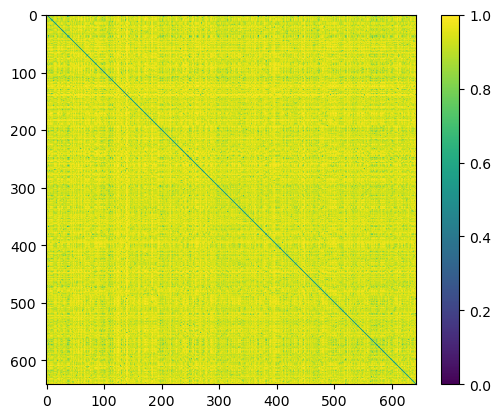

In [15]:
# Compute the pairwise Tanimoto similarity distance using Morgan fingerprints.
data = dm.data.freesolv()
data["mol"] = data["smiles"].apply(lambda x: dm.to_mol(x))

mols = data["mol"].to_list()
dist_mat = dm.pdist(mols, n_jobs=None)
plt.imshow(dist_mat)
plt.colorbar()

### Parallelize anything

In [16]:
# Easy parallelization
def compute_something(mol):
    # just a fake computation
    result = mol.GetNumAtoms() ** 0.5
    return mol, result


data = dm.data.freesolv()
data["mol"] = data["smiles"].apply(lambda x: dm.to_mol(x))

results = dm.parallelized(compute_something, data["mol"].tolist(), n_jobs=None)
results[:5]

[(<rdkit.Chem.rdchem.Mol at 0x7f1f4ff2a140>, 3.605551275463989),
 (<rdkit.Chem.rdchem.Mol at 0x7f1f4ff29e40>, 2.23606797749979),
 (<rdkit.Chem.rdchem.Mol at 0x7f1f4ff2a620>, 2.23606797749979),
 (<rdkit.Chem.rdchem.Mol at 0x7f1f4ff2a6e0>, 2.8284271247461903),
 (<rdkit.Chem.rdchem.Mol at 0x7f1f4ff2a800>, 2.8284271247461903)]